<a href="https://colab.research.google.com/github/Astorga171980/Hello-world/blob/main/ADEN%20CHURN%20CUSTOMER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ADEN FLOW CHURN POR LUIS ASTORGA

In [1]:
!pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 74.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import sklearn
print(sklearn.__version__)



1.3.1


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cargando data desde el excel ADEN

In [5]:
import pandas as pd

# Load data from CSV file
file_path = '/content/drive/MyDrive/ADEN DATA SETS /customer_churn.csv'
df = pd.read_csv(file_path)

# Explore the loaded data
print(df.head())  # Display the first few rows of the DataFrame


   ID CHURN Gender Status  Children  Est Income Car Owner        Age  \
0   1     T      F      S       1.0    38000.00         N  24.393333   
1   6     F      M      M       2.0    29616.00         N  49.426667   
2   8     F      M      M       0.0    19732.80         N  50.673333   
3  11     F      M      S       2.0       96.33         N  56.473333   
4  14     F      F      M       2.0    52004.80         N  25.140000   

   LongDistance  International   Local  Dropped Paymethod LocalBilltype  \
0         23.56            0.0  206.08      0.0        CC        Budget   
1         29.78            0.0   45.50      0.0        CH     FreeLocal   
2         24.81            0.0   22.44      0.0        CC     FreeLocal   
3         26.13            0.0   32.88      1.0        CC        Budget   
4          5.03            0.0   23.11      0.0        CH        Budget   

  LongDistanceBilltype   Usage  RatePlan  
0       Intnl_discount  229.64       3.0  
1             Standard   75.29

In [32]:
# Data Preprocessing
# 'CHRUN' target variable, modify this based on column names
X = df.drop(columns=['CHURN'])  # Features
y = df['CHURN']  # Target variable

from sklearn.preprocessing import LabelEncoder

# Modifying 'Gender' column is treated as a pandas DataFrame , change to 0 and 1
X['Gender'] = X['Gender'].astype(str)

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the 'Gender' column
X['Gender'] = label_encoder.fit_transform(X['Gender'])




In [33]:
print(X.dtypes)  # Check data types of columns, ensure 'Gender' is object type



ID                        int64
Gender                    int64
Status                   object
Children                float64
Est Income              float64
Car Owner                object
Age                     float64
LongDistance            float64
International           float64
Local                   float64
Dropped                 float64
Paymethod                object
LocalBilltype            object
LongDistanceBilltype     object
Usage                   float64
RatePlan                float64
dtype: object


In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['Status', 'Car Owner', 'Paymethod', 'LocalBilltype', 'LongDistanceBilltype']

for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column].astype(str))


In [35]:
print(X['Gender'].unique())  # Check unique values after label encoding


[0 1]


In [25]:
# 'Churn' target variable
y = df['CHURN']

# Define features
features = ['Children', 'Est Income', 'Age', 'LongDistance', 'International', 'Local', 'Dropped', 'Usage', 'RatePlan']
X = df[features]


In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model (Random Forest Classifier example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [28]:
# Make predictions on the test data
predictions = model.predict(X_test)


In [29]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

# Print classification report
print('Classification Report:\n', classification_report(y_test, predictions))


Accuracy: 0.9833333333333333
Classification Report:
               precision    recall  f1-score   support

           F       0.98      0.99      0.99       220
           T       0.99      0.97      0.98       140

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [37]:
!pip install matplotlib seaborn


ESTE ES EL RESULTADO USANDO LA MATRIZ DE CONFUSION


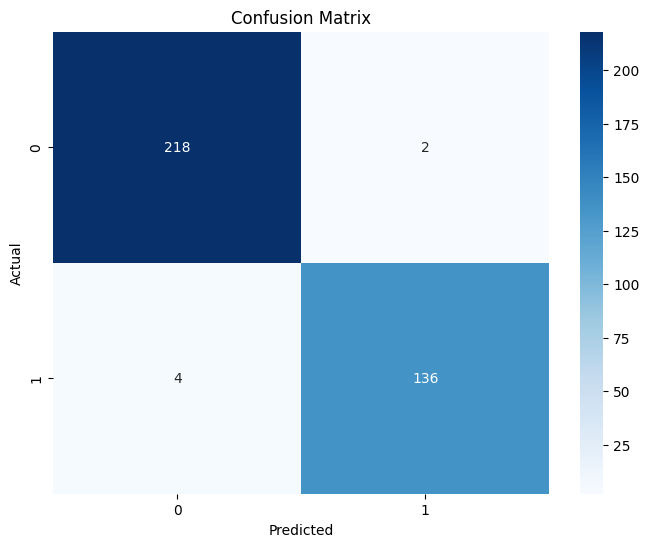

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
